# Brain Tumor classification
## Using deep learning

Detect if there is a Tumor in a brain scan.

### Import libraries define vars

In [79]:
# import all libraries
import tensorflow as tf
from keras.layers import *
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array

In [63]:
# define variables nd hyperparameters
EPOCHS = 35
BATCH_SIZE = 16
IMAGE_HEIGHT = 120
IMAGE_WIDTH = 120
NUM_CLASSES = 2
DATA_PATH = "data/"

### Create dataset

In [87]:
# Create the train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(DATA_PATH,
                                                              labels="inferred",
                                                              label_mode="int",
                                                              color_mode="rgb",
                                                              batch_size=BATCH_SIZE,
                                                              image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                              shuffle=True,
                                                              seed=123,
                                                              validation_split=0.1,
                                                              subset="training")

Found 253 files belonging to 2 classes.
Using 228 files for training.


In [88]:
# create the validation dataset 
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(DATA_PATH,
                                                                   labels="inferred",
                                                                   label_mode="int",
                                                                   color_mode="rgb",
                                                                   batch_size=BATCH_SIZE,
                                                                   image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                                                   shuffle=True,
                                                                   seed=123,
                                                                   validation_split=0.1,
                                                                   subset="validation")

Found 253 files belonging to 2 classes.
Using 25 files for validation.


### Preprocessing

In [89]:
def augmentation(X, y):
    """
    This function will augment the data
    """
    image = tf.image.random_brightness(X, max_delta=0.05)    
    
    return image, y

In [90]:
# apply the augmentation
train_ds = train_ds.map(augmentation)
validation_ds = validation_ds.map(augmentation)

### Neural Networks

In [91]:
# define the model
model = Sequential()

# input Conv layer
model.add(Conv2D(16, kernel_size=(3, 3), padding="same", input_shape=(120, 120, 3), activation="relu"))

# Conv and MaxPooling layers
model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D((2, 2)))


# Flatten
model.add(Flatten())

# Dense layers
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))

# Dropout layer
model.add(Dropout(0.1))

# Output layer
model.add(Dense(NUM_CLASSES, activation="softmax"))

In [92]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [93]:
# Model's summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 120, 120, 16)      448       
                                                                 
 conv2d_41 (Conv2D)          (None, 120, 120, 32)      4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 60, 60, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 57600)           

In [94]:
# Train the model
history = model.fit(train_ds, validation_data=validation_ds, epochs=EPOCHS)

Epoch 1/35
15/15 [==============================] - 2s 128ms/step - loss: 66.8336 - accuracy: 0.6711 - val_loss: 1.5632 - val_accuracy: 0.8400
Epoch 2/35
15/15 [==============================] - 1s 91ms/step - loss: 1.1160 - accuracy: 0.7325 - val_loss: 0.5578 - val_accuracy: 0.8000
Epoch 3/35
15/15 [==============================] - 1s 92ms/step - loss: 0.3319 - accuracy: 0.8509 - val_loss: 0.4977 - val_accuracy: 0.8000
Epoch 4/35
15/15 [==============================] - 1s 92ms/step - loss: 0.1922 - accuracy: 0.9386 - val_loss: 0.2364 - val_accuracy: 0.9200
Epoch 5/35
15/15 [==============================] - 1s 92ms/step - loss: 0.1396 - accuracy: 0.9649 - val_loss: 0.3988 - val_accuracy: 0.8800
Epoch 6/35
15/15 [==============================] - 1s 92ms/step - loss: 0.0683 - accuracy: 0.9737 - val_loss: 0.2823 - val_accuracy: 0.9200
Epoch 7/35
15/15 [==============================] - 1s 92ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.2869 - val_accuracy: 0.8800
Epoch 8/35


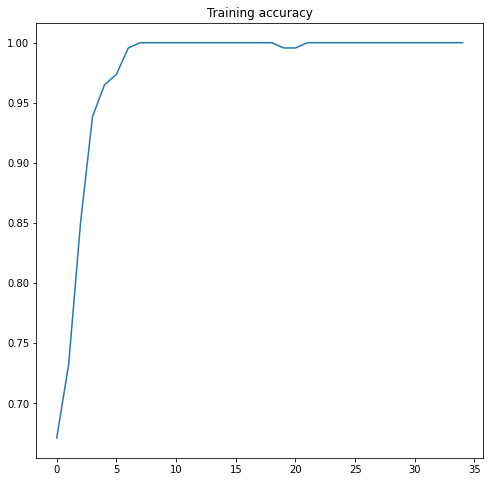

In [95]:
# get the model accuracy and loss
accuracy = history.history["accuracy"]

# define epochs range
epochs_range = range(EPOCHS)


# Plot the accuracy
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, accuracy, label="Training Accuracy")
plt.title("Training accuracy")

# show
plt.show()

In [96]:
# save the model
model.save("model.h5")

### Load and use the model

In [108]:
def predict(model, img_path):
    """
    This function will make model to do some predictions
    """
    # load and process the image
    img = image.load_img(img_path, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    
    # define the label map
    label_map = {
        0 : "No Tumor detected!",
        1 : "Tumor detected!"
    }
    
    # make prediction
    output = np.argmax(model.predict(img))
    prediction = label_map[output]
    
    return prediction

In [109]:
# load model
model = tf.keras.models.load_model("model.h5")

In [124]:
img = "test samples/tumor1.png"
predict_image = predict(model, img)
print(predict_image)

1/1 [==============================] - 0s 10ms/step
Tumor detected!


In [130]:
img = "test samples/tumor2.jpg"
predict_image = predict(model, img)
print(predict_image)

1/1 [==============================] - 0s 19ms/step
Tumor detected!


In [126]:
img = "test samples/No tumor.jpg"
predict_image = predict(model, img)
print(predict_image)

1/1 [==============================] - 0s 8ms/step
No Tumor detected!


In [128]:
img = "test samples/No tumor2.jpg"
predict_image = predict(model, img)
print(predict_image)

1/1 [==============================] - 0s 16ms/step
No Tumor detected!
